In [1]:
# Впишите библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

### Задание 1
**задание - 1 балл**</br>
загрузить данные, индекс переменная вида дата/время

In [8]:
df = pd.read_csv('crime.csv.zip')
df.head()

,Unnamed: 0,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,2010-07-01 00:10,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,2010-07-01 00:11,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2,2010-07-01 00:35,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
3,2010-07-01 00:44,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
4,2010-07-01 01:10,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273181 entries, 0 to 273180
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             273181 non-null  object 
 1   id                     273181 non-null  object 
 2   state                  273181 non-null  object 
 3   location_raw           273181 non-null  object 
 4   county_name            273181 non-null  object 
 5   county_fips            273181 non-null  float64
 6   fine_grained_location  273181 non-null  object 
 7   police_department      273181 non-null  object 
 8   driver_gender          273181 non-null  object 
 9   driver_age_raw         273181 non-null  float64
 10  driver_age             273181 non-null  float64
 11  driver_race_raw        273181 non-null  object 
 12  driver_race            273181 non-null  object 
 13  violation_raw          273181 non-null  object 
 14  violation              273181 non-nu

In [10]:
df = df[~df.index.duplicated(keep='last')] # убираю дубликаты 

In [11]:
df.shape

(273181, 22)

### Задание 2
**задание - 1 балл**</br>
построить сводную таблицу по клоличеству правонарушений (строки - расса `driver_race`, колонки - пол `driver_gender`) 

In [12]:
gender_offense = pd.crosstab(df['driver_race'], df['driver_gender'])
display(gender_offense)

driver_gender,F,M
driver_race,,
Asian,1022,2424
Black,1339,4232
Hispanic,579,1983
Other,75,188
White,96096,165243


### Задание 3
**задание - 1 балл**</br>
построить сводную таблицу по долям правонарушений в зависимости от рассы `driver_race`(1 - для каждой рассы) и пола внутри рассы `driver_gender` (например, белые мужчины 0.8, белые женщины 0.2), в таблице строки - расса,  колонки - пол. Внимание! сумма по строке должна быть равна 1. 

In [51]:
pivot_table = df.pivot_table(index='driver_race', columns='driver_gender', values='violation', aggfunc='count', fill_value=0)

# Нормализуем данные, чтобы сумма по строке была равна 1
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

display(pivot_table)

driver_gender,F,M
driver_race,,
Asian,0.287462,0.712538
Black,0.241283,0.758717
Hispanic,0.230876,0.769124
Other,0.290323,0.709677
White,0.369163,0.630837


### Задание 4
**задание - 1 балл**</br>
найти ежемесячное среднее количество преступлений. Результат в виде Series: индексы дата/время.

In [16]:
df['datetime'] = pd.to_datetime(df['Unnamed: 0'])

# Установим временной индекс и агрегируем по месяцам
df.set_index('datetime', inplace=True)
monthly_counts = df.resample('M').size()

# Рассчитаем среднее количество преступлений в месяц
monthly_mean_series = monthly_counts.resample('M').mean()

display(monthly_mean_series)

datetime
2010-07-31    4281.0
2010-08-31    3429.0
2010-09-30    3751.0
2010-10-31    3644.0
2010-11-30    4430.0
               ...  
2015-08-31    3521.0
2015-09-30    3260.0
2015-10-31    3192.0
2015-11-30    3019.0
2015-12-31    2096.0
Freq: M, Length: 66, dtype: float64

### Задание 5
**задание - 1 балл**</br>
найти ежедневное количество водителей с опьянением `DUI` (см. столбец: `violation` ) и на этой основе построить столбцовую диаграмму агрегировав среднее количество водителей с опьянением по дням недели. Дни недели подписать русскими сокращенными названиями.

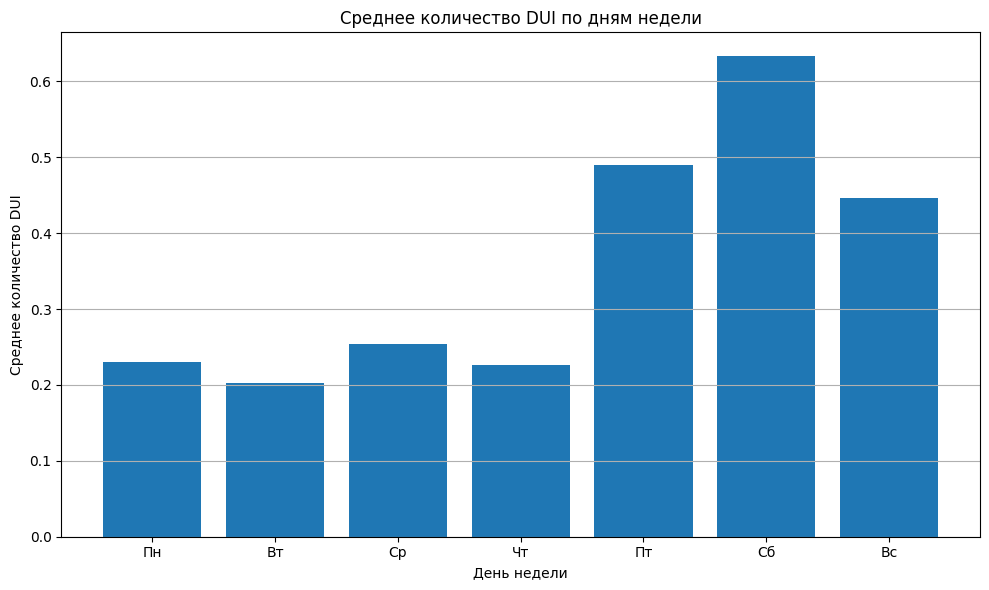

In [18]:
dui_df = df[df['violation'].str.contains('DUI', case=False, na=False)]
daily_dui_counts = dui_df.resample('D').size()
weekday_avg_dui = daily_dui_counts.groupby(daily_dui_counts.index.weekday).mean()
days_rus = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

plt.figure(figsize=(10, 6))
plt.bar(days_rus, weekday_avg_dui)
plt.title('Среднее количество DUI по дням недели')
plt.xlabel('День недели')
plt.ylabel('Среднее количество DUI')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Задание 6
**задание - 2 балла**</br>
Самостоятельно написать код который опровергает или подтверждает внутригодовую цикличность нарушений по оборудованию автомобиля `Equipment` (см. столбец: `violation` ) для всего диапазона данных.

/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_17246/3823258648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equipment_df['year'] = equipment_df.index.year
/var/folders/tp/h3xwbjzj52g1cjhylcmqhphr0000gn/T/ipykernel_17246/3823258648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equipment_df['month'] = equipment_df.index.month


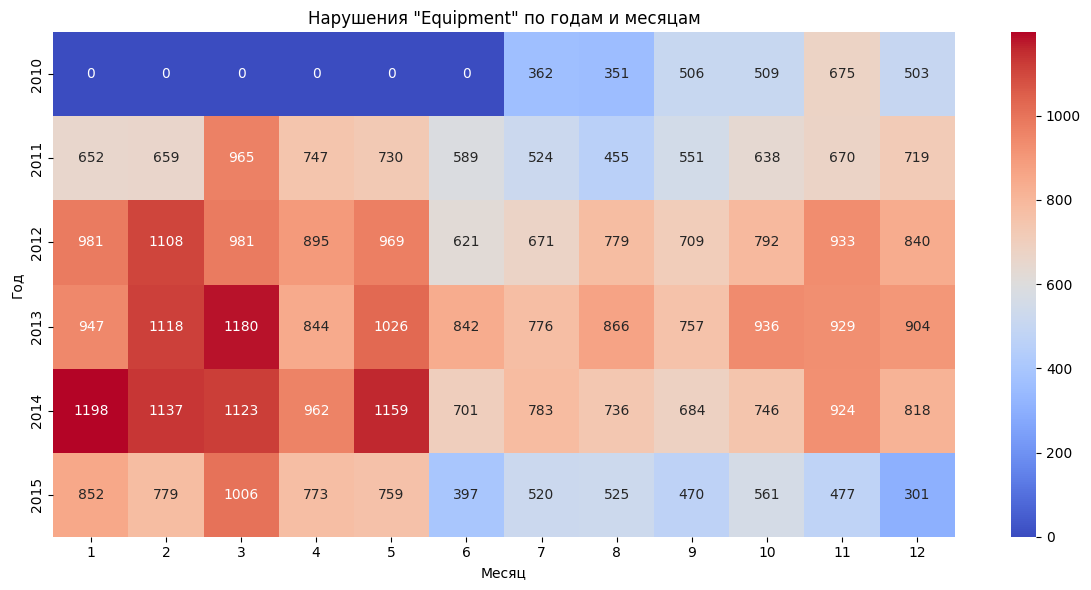

Средний коэффициент вариации по месяцам: 0.40
Есть признаки внутригодовой цикличности нарушений Equipment


In [26]:
df['datetime'] = pd.to_datetime(df['Unnamed: 0']) # да, писал выше, но я перестрахуюсь
df.set_index('datetime', inplace=True)

equipment_df = df[df['violation'].str.lower() == 'equipment']

# Группировка по годам и месяцам
equipment_df['year'] = equipment_df.index.year
equipment_df['month'] = equipment_df.index.month
monthly_counts = equipment_df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_counts, cmap='coolwarm', annot=True, fmt='d')
plt.title('Нарушения "Equipment" по годам и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Год')
plt.tight_layout()
plt.show()

# Проверка цикличности: коэффициент вариации по месяцам
monthly_avg = monthly_counts.mean(axis=0)
monthly_std = monthly_counts.std(axis=0)
coef_var = (monthly_std / monthly_avg).mean()

print(f'Средний коэффициент вариации по месяцам: {coef_var:.2f}')

if coef_var > 0.15:
    print("Есть признаки внутригодовой цикличности нарушений Equipment")
else:
    print("Нет выраженной внутригодовой цикличности нарушений Equipment")

### Задание 7
**задание - 2 балла**</br>
Найдите "самый пьяный час", когда по пятницам-воскресеньям задерживают в среднем максимальное число водителей с опьянением `DUI` (см. столбец: `violation`). Напишите код, сопроводите его визуализацией и выведите самый пьяный час и среднее количество задержанных.

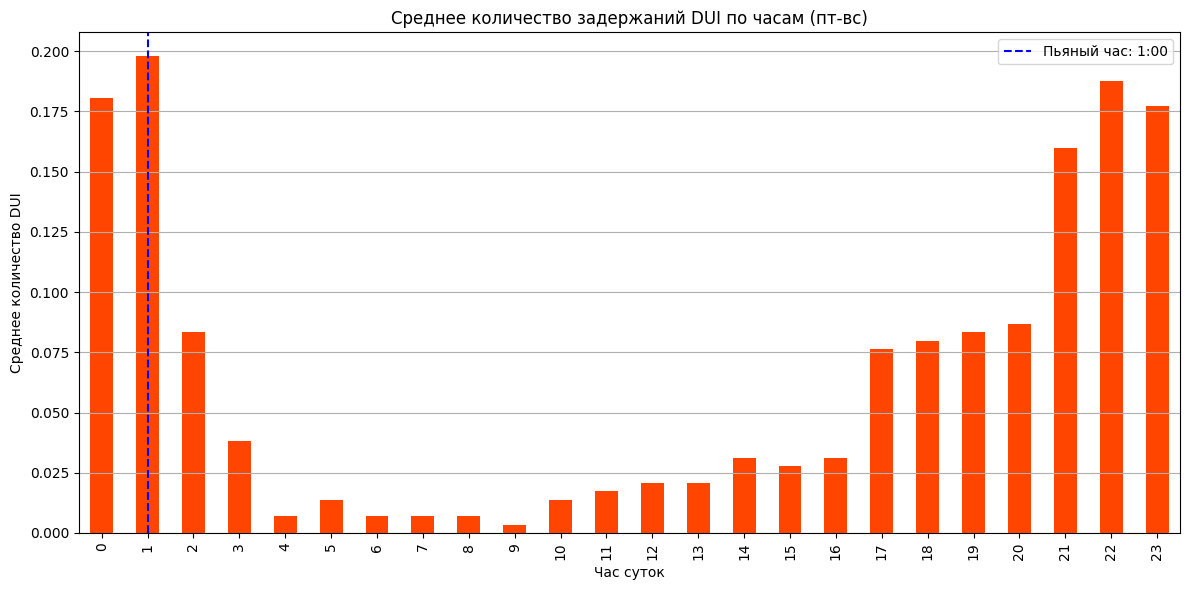

Самый "пьяный" час: 1:00
Среднее количество задержанных в этот час: 0.20


In [28]:
dui_df = df[df['violation'].str.contains('DUI', case=False, na=False)]
dui_df = dui_df[dui_df.index.weekday.isin([4, 5, 6])]
dui_df['hour'] = dui_df.index.hour
dui_df['date'] = dui_df.index.date
hourly_counts = dui_df.groupby(['date', 'hour']).size().unstack(fill_value=0)
mean_per_hour = hourly_counts.mean()

# Нахождение самого "пьяного часа"
drunkest_hour = mean_per_hour.idxmax()
max_avg = mean_per_hour.max()


plt.figure(figsize=(12, 6))
mean_per_hour.plot(kind='bar', color='orangered')
plt.title('Среднее количество задержаний DUI по часам (пт-вс)')
plt.xlabel('Час суток')
plt.ylabel('Среднее количество DUI')
plt.axvline(drunkest_hour, color='blue', linestyle='--', label=f'Пьяный час: {drunkest_hour}:00')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Вывод результатов
print(f'Самый "пьяный" час: {drunkest_hour}:00')
print(f'Среднее количество задержанных в этот час: {max_avg:.2f}')

### Задание 8
**задание - 1 балла**</br>
Существует ли округа со значительным количеством правонарушениями по рассовому признаку? Напишите код, подтвердите или опровергните это утверждение.

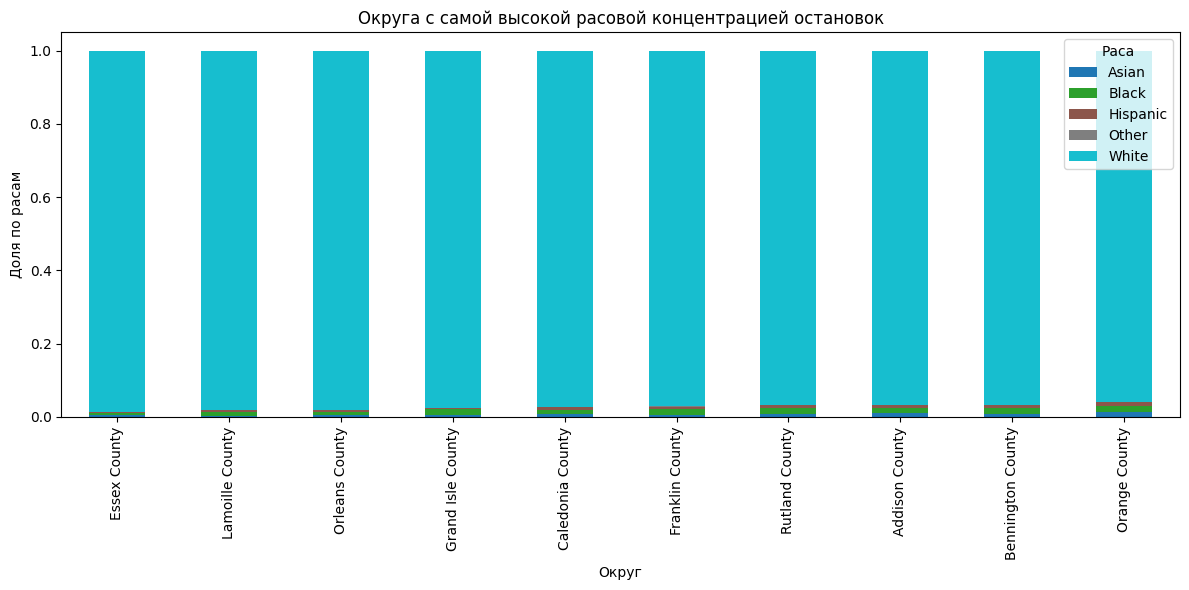

Найдены округа с выраженным расовым перекосом:
['Essex County', 'Lamoille County', 'Orleans County', 'Grand Isle County', 'Caledonia County', 'Franklin County', 'Rutland County', 'Addison County', 'Bennington County', 'Orange County']


In [33]:
max_race_share = race_shares.max(axis=1)
outlier_counties = race_shares[max_race_share > 0.85]
outlier_counties['max_share'] = max_race_share[max_race_share > 0.85]
top_outliers = outlier_counties.sort_values('max_share', ascending=False).drop(columns='max_share').head(10)


top_outliers.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Округа с самой высокой расовой концентрацией остановок')
plt.xlabel('Округ')
plt.ylabel('Доля по расам')
plt.legend(title='Раса')
plt.tight_layout()
plt.show()

print("Найдены округа с выраженным расовым перекосом:")
print(top_outliers.index.tolist())
